### Problem Statement
Rate of divorce in Singapore over the years.

Data from the Department of Statistics show that annulments, marriage dissolutions, and Divorce rates in Singapore remain at an all-time high. In 2020 alone, 6,959 married couples filed for Divorce. The Ministry of Social and Family Development (MSF) also discovered that recently-wed couples separate earlier than those married for a long time.

Social workers who work with divorcing couples attributed the trend to factors such as an increase in family stress factors, less quality time as more dual-income couples focus on their careers, shifting perceptions and less stigma towards divorce, and poor conflict management skills, among others.[https://www.straitstimes.com/singapore/more-spore-couples-especially-those-recently-married-getting-divorced-msf-report]

Communication with each other is top 4 reason for divorce. [https://blackbox.com.sg/everyone/honey-you-can-have-him-rising-divorce-in-singapore]

How attachment style affect communication?

## Success Metric

Accuracy?? F1 score? Precision?

## Import libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import string
import nltk
import re

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Set the display option to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('df.csv')

In [4]:
df['title_post'] = df['title'] + ' ' + df['post_text'].fillna('')

In [5]:
# Class 0 = Avoidant
# Class 1 = Anxious

df.head()

,title,post_text,class,title_post
0,Seriously though {FA}{DA},NaN,0,Seriously though {FA}{DA}
1,For all my favorite avoidants ❤️,NaN,0,For all my favorite avoidants ❤️
2,Anxious People on this subreddit: stop abandon...,If you’re anxious preoccupied or anxious leani...,0,Anxious People on this subreddit: stop abandon...
3,Same {FA},NaN,0,Same {FA}
4,And that’s on self development,NaN,0,And that’s on self development


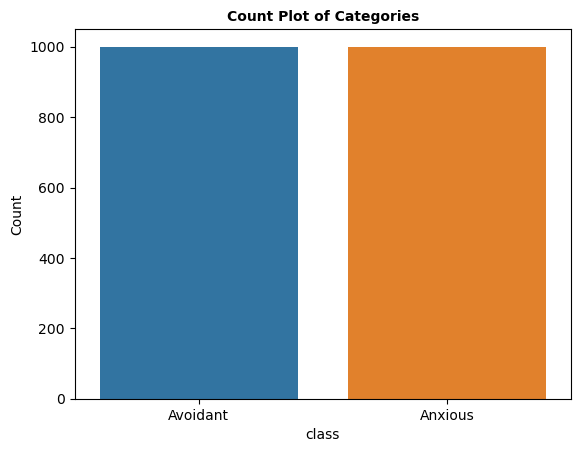

In [6]:
# Countplot of class
sns.countplot(x=df['class'])

# Set title and axis label
plt.title('Count Plot of Categories', fontsize=10, fontweight='bold')
plt.ylabel('Count')
plt.xticks([0,1],['Avoidant','Anxious'])

plt.show()

In [7]:
# List of stopwords
stopword = nltk.corpus.stopwords.words('english')

# Lemmatizer
wn = nltk.WordNetLemmatizer()

In [8]:
# Remove punctuations
def remove_punct(text):
    # store character only if it is not a punctuation
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['title_post_punct'] = df['title_post'].apply(lambda x: remove_punct(x.lower()))

# Remove words that contain http
def remove_url(text):
    text_nourl = re.sub(r'\S*http\S*', '', text)
    return text_nourl

df['title_post_clean'] = df['title_post_punct'].apply(lambda x: remove_url(x))

# Remove words that contain digit
def remove_digit(text):
    text_nodigit = re.sub(r'\w*\d\w*', '', text)
    return text_nodigit

df['title_post_clean'] = df['title_post_clean'].apply(lambda x: remove_digit(x))

# Tokenize
def tokenize(text):  
    # /W matches any character that is neither alphanumeric nor underscoreb
    # Add a + just in case there are 2 or more spaces between certain words
    tokens = re.split('\W+', text)
    return tokens

df['title_post_tokenized'] = df['title_post_clean'].apply(lambda x: tokenize(x)) 
# .lower to lowercase everything, otherwise will have variations of the same word (caps vs no caps)

# Remove stop words
def remove_stopwords(tokenized_list):
    # Store in text only if word is not found in stopword i.e. it is not a stopword
    text = [word for word in tokenized_list if word not in stopword]
    return text

df['title_post_nostop'] = df['title_post_tokenized'].apply(lambda x: remove_stopwords(x))

# Lemmatize (remove stop words)
def lemmatizing(tokenized_text):
    # return list of all lemmatized words for their corresponding words in tokenized_text
    text = [wn.lemmatize(word) for word in tokenized_text]
    return ' '.join(text)

df['title_post_lemma_nostop'] = df['title_post_nostop'].apply(lambda x: lemmatizing(x))

In [9]:
df.head()

,title,post_text,class,title_post,title_post_punct,title_post_clean,title_post_tokenized,title_post_nostop,title_post_lemma_nostop
0,Seriously though {FA}{DA},NaN,0,Seriously though {FA}{DA},seriously though fada,seriously though fada,"[seriously, though, fada, ]","[seriously, though, fada, ]",seriously though fada
1,For all my favorite avoidants ❤️,NaN,0,For all my favorite avoidants ❤️,for all my favorite avoidants ❤️,for all my favorite avoidants ❤️,"[for, all, my, favorite, avoidants, ]","[favorite, avoidants, ]",favorite avoidants
2,Anxious People on this subreddit: stop abandon...,If you’re anxious preoccupied or anxious leani...,0,Anxious People on this subreddit: stop abandon...,anxious people on this subreddit stop abandoni...,anxious people on this subreddit stop abandoni...,"[anxious, people, on, this, subreddit, stop, a...","[anxious, people, subreddit, stop, abandoning,...",anxious people subreddit stop abandoning blami...
3,Same {FA},NaN,0,Same {FA},same fa,same fa,"[same, fa, ]","[fa, ]",fa
4,And that’s on self development,NaN,0,And that’s on self development,and that’s on self development,and that’s on self development,"[and, that, s, on, self, development, ]","[self, development, ]",self development


In [10]:
def top_20_words_nostopwords(class_,num):
    # instantiating countvectorizer
    cvec = CountVectorizer(ngram_range=(num, num))
    # fit and transform 
    X_nostop = cvec.fit_transform(df['title_post_lemma_nostop'].loc[df['class']==class_])
    # convert sparse matrix to dataframe
    nostop_count_df = pd.DataFrame(X_nostop.toarray(), columns=cvec.get_feature_names_out())
    # plot the count of top words
    plt.figure(figsize=(6,4))
    nostop_count_df.sum().sort_values(ascending=False).head(20).plot(kind='barh') 
    plt.title('Top 20 words (stop words removed)')

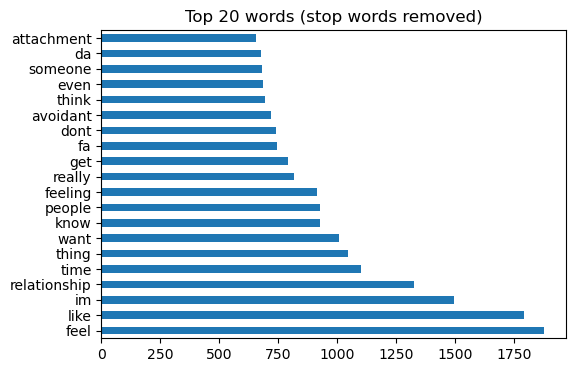

In [11]:
# top 20 words for 'avoidant' in unigram
top_20_words_nostopwords(0,1)

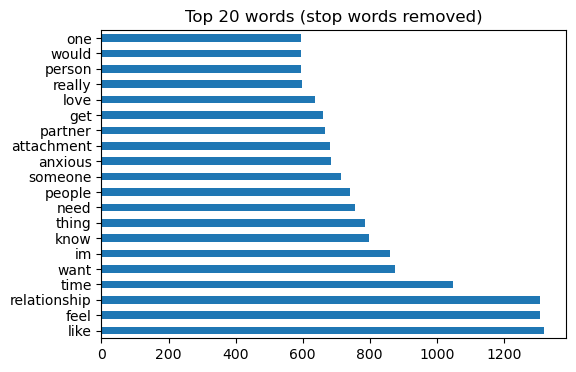

In [12]:
# top 20 words for 'anxious' in unigram
top_20_words_nostopwords(1,1)

In [13]:
## code for extra stop words

#extrastopword = ['']
#stopword.extend(extrastopword)

In [14]:
# train/test split default accuracy
# Set up X and y
X = df['title_post_lemma_nostop']
y = df['class']

# Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [ ]:
# TFIDF + Logistic Regression pipeline.
pipe_tvec_logreg = Pipeline([('tvec', TfidfVectorizer()),
                             ('logreg', LogisticRegression())])

# Set hyperparameters for tuning
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens), (individual tokens and bigrams), (bigrams), (trigrams)
# Regularization strength (C), penalty (l1: lasso or l2: ridge)
pipe_tvec_logreg_params = {
    'tvec__max_features': [5_000],  #[2_000, 3_000, 4_000, 5_000]
    'tvec__min_df': [2], #[2, 3]
    'tvec__max_df': [.9], #[.9, .95]
    'tvec__ngram_range': [(1,2)],   #[(1,1), (1,2), (2,2)]
    'logreg__solver': ['liblinear'],  #['newton-cg', 'lbfgs', 'liblinear']
    'logreg__C': [1],  #[0.01, 0.1, 1.0, 10]
    'logreg__penalty': ['l2']}

# Instantiate GridSearchCV
tvec_logreg = GridSearchCV(pipe_tvec_logreg, param_grid=pipe_tvec_logreg_params, cv=5) 

# Fit GridSearch to training data.
tvec_logreg.fit(X_train, y_train)

# What's the best score? Mean cross-validated score of the best_estimator
print(f'Mean cross-validated score: {tvec_logreg.best_score_}')

# Score model on training set.
# uses the best estimator found during GridSearchCV to make predictions on the training data and calculates the accuracy.
print(f'accuracy on train: {tvec_logreg.score(X_train, y_train)}')

# Score model on testing set.
print(f'accuracy on test: {tvec_logreg.score(X_test, y_test)}')

# Making predictions
y_pred_tvec_logreg = tvec_logreg.predict(X_test)
print(classification_report(y_test, y_pred_tvec_logreg))

In [ ]:
# To get the features of Smallest Positive Coefficient and highest negative coefficient
# i.e. features which can be removed

# Extract the coefficients and feature names
coef = tvec_logreg.best_estimator_['logreg'].coef_[0]
features = tvec_logreg.best_estimator_['tvec'].get_feature_names_out()

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({'Features': features, 'Importance': coef})

# Separate positive and negative coefficients
positive_coeffs = feature_importance[feature_importance['Importance'] > 0]
negative_coeffs = feature_importance[feature_importance['Importance'] < 0]

# Find the smallest positive coefficient
smallest_positive_coeff = positive_coeffs.nsmallest(50, 'Importance')

# Find the highest negative coefficient
highest_negative_coeff = negative_coeffs.nlargest(50, 'Importance')

# Print the results
print("Smallest Positive Coefficient:")
print(smallest_positive_coeff)

print("\nHighest Negative Coefficient:")
print(highest_negative_coeff)

In [ ]:
# code from kishan for smote

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def countvectorize_split_smote_logistic(X, y, test_size=0.3, random_state=88):
    # Step 1: Apply CountVectorizer
    vectorizer = TfidfVectorizer()
    X_vectorized = vectorizer.fit_transform(X)
    
    # Step 2: Perform train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=test_size, random_state=random_state)
    
    # Step 3: Apply SMOTE to the training data
    smote = SMOTE(random_state=random_state)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Step 4: Train a logistic regression model
    classifier = RandomForestClassifier(n_estimators=200, random_state=30)

    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Step 5: Evaluate on training and test data
    train_predictions = classifier.predict(X_train_resampled)
    test_predictions = classifier.predict(X_test)
    
    train_accuracy = accuracy_score(y_train_resampled, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    
    return train_accuracy, test_accuracy

# Invoke Function 
countvectorize_split_smote_logistic(X,y)